Viena užduotis maždaug
vienai paskaitai. Techniniai reikalavimai –
Jupyter Notebook’as arba Streamlit aplinka. Grafikai turi turėti
pavadinimus, ašys pavadintos prasmingai, jei grafike yra daugiau nei
viena kreivė – legenda būtina. Panaudoti boxplot,
swarmplot, heatmap, pairplot, (h)bar,
histogram, scatter. Būtina pasirašyti 1 – 2
sakinius į JupyterNotebook’ą apie tai, ką matote, ką galite
pasakyti iš grafiko (ką matote grafike, 1-2 sakiniai vienam
grafikui, tad jei turėsite 10 grafikų – 20 sakinių).

5  

Duomenys:
https://data.gov.lt/datasets/2829/
- Stacionaro ir ambulatoriniai ligoniai, gydyti nuo traumų ir
apsinuodijimų. Įvertinkite patiriamų traumų, apsinuodijimų
dažnius/pasiskirstymą, sunkumą pagal amžių/amžiaus
grupes, lytį, paros, metų, darbo dienų/švenčių/išeiginių. Ar
traumų pobūdis/dažnis, apsinuodijimų kiekis, pobūdis, sunkumas
priklauso nuo užfiksuotų meteorologinių sąlygų, mėnulio fazės,
švenčių/laisvadienių?
Duomenys:
https://data.gov.lt/datasets/2793/#info
– PAGD iškvietimai; https://data.gov.lt/datasets/1667/#info
– Policijos
iškvietimai. Ar
iškvietimų dažnis/kiekis priklauso nuo paros,
metų, darbo dienų/švenčių/išeiginių, mėnulio
fazės, švenčių/laisvadienių?
Mėnulio
fazės turi būti pasiekiamos per http užklausas – iš esmės
pasinaudojate web scrapingu, kad gautumėte norimą informaciją.
Papildoma informacija -
https://ligoniukasa.lrv.lt/lt/veiklos-sritys/informacija-gyventojams/gydymo-ir-sveikatos-prieziuros-paslaugos/stebejimo-paslaugos/
;

TLK kodų paaiškinimai yra šiame excel faile:
https://ligoniukasa.lrv.lt/uploads/ligoniukasa/documents/files/1(9).xlsx

Jūs turėsite sujungti tris failus:
https://data.gov.lt/datasets/2829/data/Pacientas/
https://data.gov.lt/datasets/2829/data/Ligonine/
ir pateiktą excel'io failą, kad turėtumėte vientisą lentelę su reikiamais duomenimis.
Prie jų jungsite infromaciją iš
https://astropixels.com/ephemeris/phasescat/phasescat.html
ARBA day.lt - bus paprasčiau:
https://day.lt/diena/2021.04.22    <--- adreso laukelyje įrašius norimą datą, gaunama informacija apie tą dieną.

iš kurios, naudodami web scraping'ą, išgausite reikiamą informaciją apie fazes. (requests bibliotekos užteks)

Kuriu ir testuoju funkciją, nustatančią mėnulio fazę.

In [ ]:
# pip install ephem --break-system-packages

In [65]:
import ephem

def get_moon_phase_usa(date=None):
    moon = ephem.Moon()
    moon.compute(date)
    phase = moon.phase
    return phase

# Naudojimas:
date = '2025/02/05'  # Data 'YYYY/MM/DD'
print(f"Mėnulio fazė {date}: {get_moon_phase_usa(date):2.0f}%")

date = '2008/08/01'  # Jaunatis
print(f"Mėnulio fazė {date}: {get_moon_phase_usa(iso_date):3.0f}% (Jaunatis)")

date = '2001/11/01'  # Pilnatis
print(f"Mėnulio fazė {date}: {get_moon_phase_usa(date):2.0f}% (Pilnatis)")


Mėnulio fazė 2025/02/05: 46%
Mėnulio fazė 2008/08/01:   0% (Jaunatis)
Mėnulio fazė 2001/11/01: 100% (Pilnatis)


In [66]:
from dateutil import parser
import ephem

def get_moon_phase_iso(iso_date=None):
    # Konvertuojama ISO data į datetime objektą
    date = parser.parse(iso_date)
    # Sukuriama `ephem` mėnulio objektas
    moon = ephem.Moon()
    # Data pateikiama `ephem` suprantamu formatu
    moon.compute(date)
    phase = moon.phase
    return phase

# Naudojimas:
date = '2025-02-05'  # Data
print(f"Mėnulio fazė {date}: {get_moon_phase_iso(date):2.0f}%")

date = '2001-11-01'  # Pilnatis
print(f"Mėnulio fazė {date}: {get_moon_phase_iso(date):3.0f}% (Pilnatis)")

date = '2008-08-01'  # Jaunatis
print(f"Mėnulio fazė {date}: {get_moon_phase_iso(date):3.0f}% (Jaunatis)")


Mėnulio fazė 2025-02-05: 46%
Mėnulio fazė 2001-11-01: 100% (Pilnatis)
Mėnulio fazė 2008-08-01:   0% (Jaunatis)


In [67]:
from dateutil import parser
import ephem
from datetime import datetime

def get_moon_phase_iso2(iso_date=None):
    # Jei data nenurodyta, naudojama šiandienos data
    if not iso_date:
        date = datetime.now()
        # iso_date.replace(hour=0, minute=0, second=0, microsecond=0)
    else:
        # Konvertuojama ISO data į datetime objektą
        date = parser.parse(iso_date)

    # Sukuriama `ephem` mėnulio objektas
    moon = ephem.Moon()
    # Data pateikiama `ephem` suprantamu formatu
    moon.compute(date)
    phase = moon.phase
    # print(f"({date}, {phase})")
    return phase

# Naudojimas:
print(f"Mėnulio fazė šiuo metu: {get_moon_phase_iso2():3.0f}%")

date = '2025-02-05 19:27'  # Data
print(f"Mėnulio fazė {date}: {get_moon_phase_iso2(date):3.0f}%")

date = '2001-11-01'  # Pilnatis
print(f"Mėnulio fazė {date}: {get_moon_phase_iso2(date):3.0f}% (Pilnatis)")

date = '2008-08-01'  # Jaunatis
print(f"Mėnulio fazė {date}: {get_moon_phase_iso2(date):3.0f}% (Jaunatis)")


Mėnulio fazė šiuo metu:  56%
Mėnulio fazė 2025-02-05 19:27:  55%
Mėnulio fazė 2001-11-01: 100% (Pilnatis)
Mėnulio fazė 2008-08-01:   0% (Jaunatis)


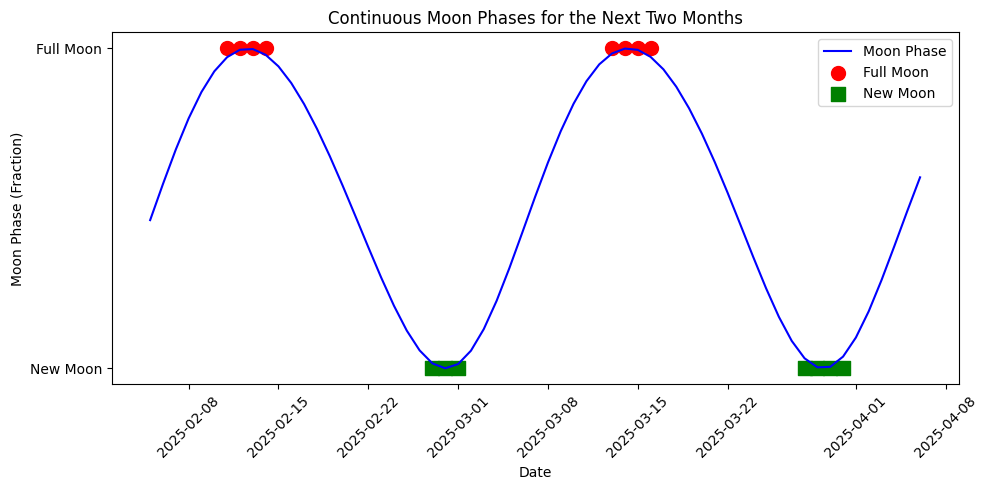

In [ ]:
import ephem

# Updated function to get moon phase as a fraction using ephem
def moon_phase_fraction(date: datetime) -> float:
    """
    Returns the moon phase as a fraction (0 to 1) for a given date using ephem.
    
    Parameters:
    date (datetime): The date for which the moon phase is determined.
    
    Returns:
    float: A fraction representing the moon phase (0 - New Moon, 1 - Full Moon).
    """
    # Convert datetime to ephem date
    obs_date = ephem.Date(date)
    moon = ephem.Moon(obs_date)
    
    # plot_moon_phases_fractionReturn the moon phase fraction
    return moon.phase / 100  # Convert phase percentage to a fraction (0-1)

# Plotting the continuous moon phases for the next two months with fractions
def plot_moon_phases_fraction(start_date: datetime) -> None:
    """
    Plots the continuous moon phases for the next two months as a fraction.
    
    Parameters:
    start_date (datetime): The starting date for the moon phase generation.
    """
    end_date = start_date + timedelta(days=60)  # Next two months
    dates = pd.date_range(start=start_date, end=end_date, freq='D')
    
    # Getting moon phase values as fractions
    moon_phases = [moon_phase_fraction(date) for date in dates]
    
    # Plotting the continuous moon phase values
    plt.figure(figsize=(10, 5))
    plt.plot(dates, moon_phases, color='b', linestyle='-', marker='', label="Moon Phase")
    
    # Marking the Full Moon and New Moon with distinct symbols
    full_moon_dates = [dates[i] for i, phase in enumerate(moon_phases) if phase >= 0.95]
    new_moon_dates = [dates[i] for i, phase in enumerate(moon_phases) if phase <= 0.05]
    
    plt.scatter(full_moon_dates, [1]*len(full_moon_dates), color='r', marker='o', s=100, label="Full Moon")
    plt.scatter(new_moon_dates, [0]*len(new_moon_dates), color='g', marker='s', s=100, label="New Moon")
    
    plt.yticks([0, 1], ['New Moon', 'Full Moon'])
    plt.xlabel('Date')
    plt.ylabel('Moon Phase (Fraction)')
    plt.title('Continuous Moon Phases for the Next Two Months')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot the moon phases starting from today at midnight
plot_moon_phases_fraction(datetime(2025, 2, 5))


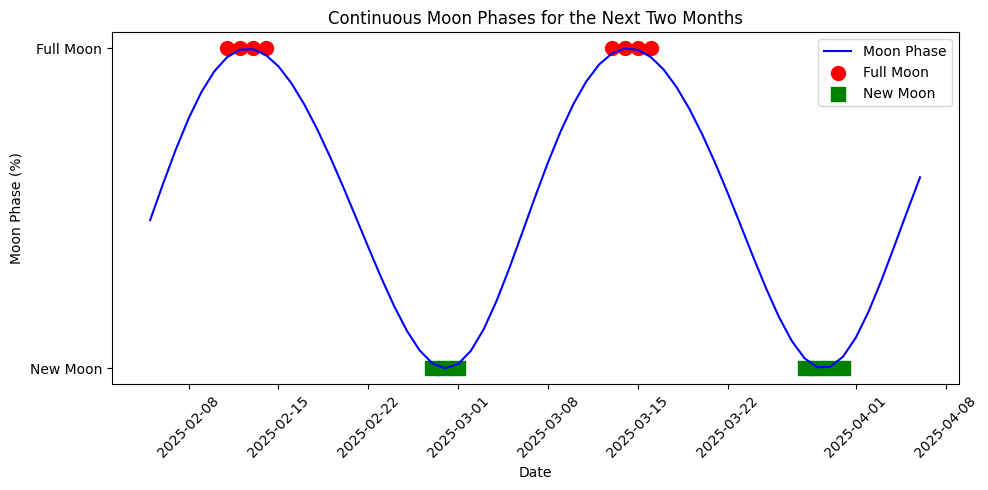

In [71]:
# Updated function to get moon phase as a percentage using ephem
def moon_phase_percentage(date: datetime) -> float:
    """
    Returns the moon phase as a percentage (0 to 100) for a given date using ephem.
    
    Parameters:
    date (datetime): The date for which the moon phase is determined.
    
    Returns:
    float: A percentage representing the moon phase (0 - New Moon, 100 - Full Moon).
    """
    # Convert datetime to ephem date
    obs_date = ephem.Date(date)
    moon = ephem.Moon(obs_date)
    
    # Return the moon phase percentage
    return moon.phase  # Return phase as percentage (0-100)

# Plotting the continuous moon phases for the next two months as percentages
def plot_moon_phases_percentage(start_date: datetime) -> None:
    """
    Plots the continuous moon phases for the next two months as a percentage.
    
    Parameters:
    start_date (datetime): The starting date for the moon phase generation.
    """
    end_date = start_date + timedelta(days=60)  # Next two months
    dates = pd.date_range(start=start_date, end=end_date, freq='D')
    
    # Getting moon phase values as percentages
    moon_phases = [moon_phase_percentage(date) for date in dates]
    
    # Plotting the continuous moon phase values
    plt.figure(figsize=(10, 5))
    plt.plot(dates, moon_phases, color='b', linestyle='-', marker='', label="Moon Phase")
    
    # Marking the Full Moon and New Moon with markers on the curve
    full_moon_dates = [dates[i] for i, phase in enumerate(moon_phases) if phase >= 95]  # Near Full Moon
    new_moon_dates = [dates[i] for i, phase in enumerate(moon_phases) if phase <= 5]  # Near New Moon
    
    # Marking Full Moon and New Moon
    plt.scatter(full_moon_dates, [100]*len(full_moon_dates), color='r', marker='o', s=100, label="Full Moon")
    plt.scatter(new_moon_dates, [0]*len(new_moon_dates), color='g', marker='s', s=100, label="New Moon")
    
    plt.yticks([0, 100], ['New Moon', 'Full Moon'])
    plt.xlabel('Date')
    plt.ylabel('Moon Phase (%)')
    plt.title('Continuous Moon Phases for the Next Two Months')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot the moon phases starting from today at midnight
plot_moon_phases_percentage(datetime(2025, 2, 5))
